In [1]:
import pandas as pd
import numpy as np


N = 10000

x = np.random.normal(size=N)
y = np.random.normal(x)
s = 1.*(x>0)

df = pd.DataFrame({"X": x, "Y": y, "S": s})


In [2]:
from statsmodels.api import OLS


df['intercept'] = 1.

model = OLS(exog=df[['X', 'intercept']], endog=df['Y'])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     9854.
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:57:42   Log-Likelihood:                -14175.
No. Observations:               10000   AIC:                         2.835e+04
Df Residuals:                    9998   BIC:                         2.837e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              0.9963      0.010     99.265      0.000       0.977       1.016
intercept     -0.0045      0.010     -0.452      0.651      -0.024       0.015
==============================================================================
Omnibus:                        0.154   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.926   Jarque-Bera (JB):                0.170
Skew:                           0.008   Prob(JB):                        0.919
Kurtosis:                       2.989   Cond. No.                         1.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='X', ylabel='Y'>

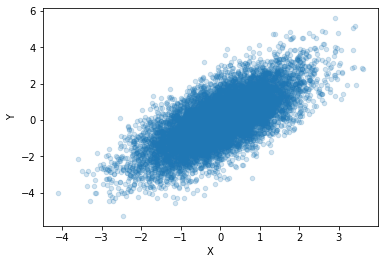

In [3]:
df.plot(x='X', y='Y', kind='scatter', alpha=0.2)

In [4]:
from statsmodels.api import OLS


df['intercept'] = 1.

s = 1

model = OLS(exog=df[df.S==s][['X', 'intercept']], 
            endog=df[df.S==s]['Y'])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     1766.
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:57:57   Log-Likelihood:                -7014.6
No. Observations:                4937   AIC:                         1.403e+04
Df Residuals:                    4935   BIC:                         1.405e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              1.0082      0.024     42.028      0.000       0.961       1.055
intercept     -0.0148      0.024     -0.624      0.533      -0.061       0.032
==============================================================================
Omnibus:                        4.047   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                4.032
Skew:                           0.070   Prob(JB):                        0.133
Kurtosis:                       3.007   Cond. No.                         2.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

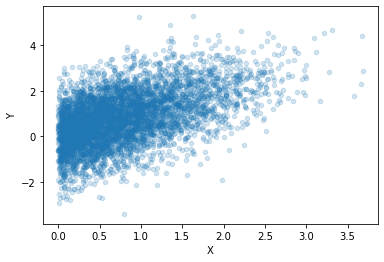

In [21]:
df[df.S == 1].plot(x='X', y='Y', kind='scatter', alpha=0.2)

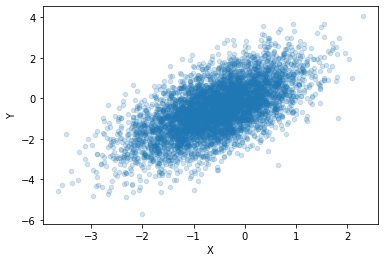

In [11]:
df[df.S == 0].plot(x='X', y='Y', kind='scatter', alpha=0.2)

In [75]:
df['residual'] = np.nan
df.loc[df.S==s, 'residual'] = result.resid

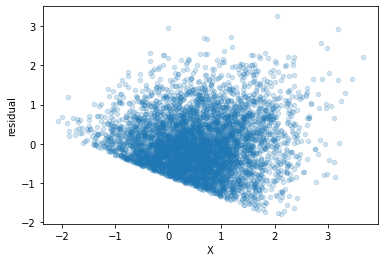

In [76]:
df[df.S==1].plot(x='X', y='residual', kind='scatter', alpha=0.2)